In [21]:
import pandas as pd

In [22]:
df = pd.read_csv('training_WeeklyAggregate.csv')

In [23]:
df.head(5)

,sourceid,dstid,dow,mean_travel_time
0,10,241,3,2334.43
1,10,612,5,1529.83
2,10,905,4,1390.04
3,10,407,7,157.91
4,10,603,4,1781.67


In [24]:
x = df[['sourceid', 'dstid', 'dow']]
y = df['mean_travel_time']

In [25]:
x.head(5)

,sourceid,dstid,dow
0,10,241,3
1,10,612,5
2,10,905,4
3,10,407,7
4,10,603,4


In [26]:
y.head(5)

0    2334.43
1    1529.83
2    1390.04
3     157.91
4    1781.67
Name: mean_travel_time, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

In [28]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=123)
rf.fit(x_train, y_train)
result = rf.predict(x_test)
result

array([1439.9792, 1599.2274, 1262.2592, ..., 1385.7538,  675.0264,
       1012.1726])

In [29]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, result)
mse

370335.07351960253

<AxesSubplot:ylabel='mean_travel_time'>

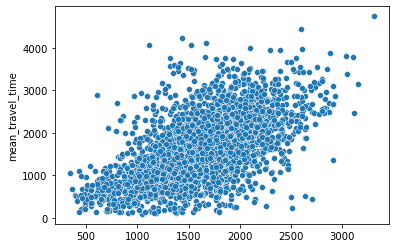

In [30]:
import seaborn as sns
sns.scatterplot(x=result, y=y_test)

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[['sourceid','dstid','dow']] =sc.fit_transform(df[['sourceid','dstid','dow']])

In [32]:
x = df[['sourceid', 'dstid','dow']]
y = df['mean_travel_time']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)
rf = RandomForestRegressor(random_state=123)
rf.fit(x_train, y_train)
result = rf.predict(x_test)

mse = mean_squared_error(y_test, result)
mse

369756.5621441818

<AxesSubplot:ylabel='mean_travel_time'>

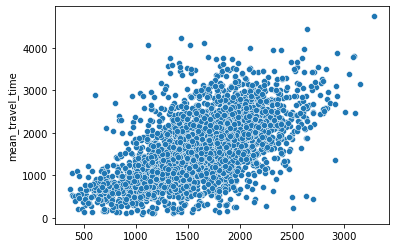

In [33]:
sns.scatterplot(x=result, y=y_test)

In [34]:
x = df[['sourceid', 'dstid','dow']]
y = df['mean_travel_time']

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)
xgb = XGBRegressor(random_state=123)
xgb.fit(x_train, y_train)
result = xgb.predict(x_test)

mse = mean_squared_error(y_test, result)
mse

406568.70702930354

In [35]:
df_test = pd.read_csv('testing_dataset.csv')

df_test[['sourceid','dstid','dow']] =sc.fit_transform(df_test[['sourceid','dstid','dow']])

In [36]:
result = rf.predict(df_test)

In [37]:
result

array([1212.8323, 1708.0654, 2111.7196, ...,  895.4186, 1094.0068,
       1029.616 ])

In [38]:
df_test['mean_travel_time'] = result

In [39]:
df_test

,sourceid,dstid,dow,mean_travel_time
0,-1.693324,1.558050,-1.035297,1212.8323
1,-1.693324,1.347821,-1.035297,1708.0654
2,-0.813216,-1.216282,-1.035297,2111.7196
3,-0.813216,1.496015,1.456426,1568.2995
4,-1.584191,1.068664,-1.035297,1327.2358
...,...,...,...,...
1957,0.778019,-0.216834,1.456426,1005.1166
1958,-1.024442,-0.489097,-1.533642,1686.5594
1959,-1.024442,0.751598,-0.536952,895.4186
1960,0.584395,0.176053,0.459737,1094.0068


In [40]:
df_test.to_csv('submission1.csv',index=False)